# ACP, Corrélation & Variabilité compos chimiques
### Conclusions principales :
Classes relativement hétérogènes, écart-type compositions chimiques entre Noms de produit < 10% => chaque produit est relativement homogène, variance expliquée par l'ACP sur sur 8 axes principaux ~ 100%, 

In [41]:
# Importations & définition des variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import plotly.graph_objects as go
import matplotlib

# Chargement des données
fichier = "../Donnees_IA_2025.xlsx"
data = pd.read_excel(fichier)

data.columns = data.columns.str.strip()  # Nettoyage des noms de colonnes

data.head()

,Ordre,Code,Classe,Nom,Nom détaillé,Pays,Année récolte,Date mesure,MS % brut,PB % brut,...,ED porc croissance (kcal) kcal/kg brut,EM porc croissance (kcal) kcal/kg brut,EN porc croissance (kcal) kcal/kg brut,EMAn coq (kcal) kcal/kg brut,EMAn poulet (kcal) kcal/kg brut,UFL 2018 par kg brut,UFV 2018 par kg brut,PDIA 2018 g/kg brut,PDI 2018 g/kg brut,BalProRu 2018 g/kg brut
0,1,657397,Céréales,Avoine,Avoine,Canada,1976-01-01,1976-01-01,87.000000,9.5,...,2460,2380,1850,2610,2480,0.81,0.76,17,62,-10.0
1,2,657400,Céréales,Avoine,Avoine,Canada,1976-01-01,1976-01-01,87.000000,11.9,...,2580,2480,1880,2590,2460,0.88,0.85,22,69,5.0
2,3,657402,Céréales,Avoine,Avoine,Canada,1976-01-01,1976-01-01,87.400002,12.2,...,2760,2660,2030,2690,2560,0.95,0.92,22,70,6.0
3,4,657404,Céréales,Avoine,Avoine,Canada,1976-01-01,1976-01-01,88.800003,10.8,...,2150,2060,1500,2080,1950,0.77,0.72,20,65,-0.5
4,5,657405,Céréales,Avoine,Avoine,Canada,1976-01-01,1976-01-01,88.300003,11.6,...,2690,2590,2000,2750,2620,0.92,0.89,21,68,3.0


In [ ]:
# Définition des variables quantitatives, cibles et qualitatives
vars_expl = [
    "MS % brut", "PB % brut", "CB % brut", "MGR % brut", "MM % brut",
    "NDF % brut", "ADF % brut", "Lignine % brut", "Amidon % brut", "Sucres % brut"
]

vars_cibles = [
    "EB (kcal) kcal/kg brut", "ED porc croissance (kcal) kcal/kg brut", "EM porc croissance (kcal) kcal/kg brut",
    "EN porc croissance (kcal) kcal/kg brut", "EMAn coq (kcal) kcal/kg brut", "EMAn poulet (kcal) kcal/kg brut",
    "UFL 2018 par kg brut", "UFV 2018 par kg brut", "PDIA 2018 g/kg brut", "PDI 2018 g/kg brut", "BalProRu 2018 g/kg brut"
]

vars_qual = ["Classe", "Nom"]

# Conversion des variables de composition et énergétiques en numérique
for col in vars_expl + vars_cibles:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

# Dictionnaire de noms réels -> noms simplifiés pour affichage
noms_simplifies = {
    "MS % brut": "MS",
    "PB % brut": "PB",
    "CB % brut": "CB",
    "MGR % brut": "MGR",
    "MM % brut": "MM",
    "NDF % brut": "NDF",
    "ADF % brut": "ADF",
    "Lignine % brut": "Lignine",
    "Amidon % brut": "Amidon",
    "Sucres % brut": "Sucres",
    "EB (kcal) kcal/kg brut": "EB",
    "ED porc croissance (kcal) kcal/kg brut": "ED porc",
    "EM porc croissance (kcal) kcal/kg brut": "EM porc",
    "EN porc croissance (kcal) kcal/kg brut": "EN porc",
    "EMAn coq (kcal) kcal/kg brut": "EMAn coq",
    "EMAn poulet (kcal) kcal/kg brut": "EMAn poulet",
    "UFL 2018 par kg brut": "UFL",
    "UFV 2018 par kg brut": "UFV",
    "PDIA 2018 g/kg brut": "PDIA",
    "PDI 2018 g/kg brut": "PDI",
    "BalProRu 2018 g/kg brut": "BalProRu"
}

# Aperçu des données
print(f"Nombre de variables explicatives : {len(vars_expl)}")
print(f"Nombre d'observations total : {data.shape[0]}")
print(f"Nombre de valeurs manquantes : {data.isnull().sum().sum()}")

Nombre de variables explicatives : 10
Nombre d'observations total : 3998
Nombre de valeurs manquantes : 0


In [ ]:
# Tableaux : nombre de noms par classe, nombre d'observations par nom

# Nombre total de classes et Noms
nb_classes = data['Classe'].nunique(dropna=True)
print(f"Nombre de classes uniques : {nb_classes}")
print(f"Nombre de Noms de produits : {data['Nom'].nunique()}")

# Nombre de noms uniques par classe
noms_par_classe = data.groupby('Classe')['Nom'].nunique().reset_index().rename(columns={'Nom': 'Nb_noms_uniques'})
display(noms_par_classe)

# Nombre d'observations par nom
obs_par_nom = data['Nom'].value_counts().reset_index()
obs_par_nom.columns = ['Nom', 'Nb_observations']
display(obs_par_nom)

Nombre de classes uniques : 12
Nombre de Noms de produits : 44


,Classe,Nb_noms_uniques
0,"Amidon, racines et tubercules",2
1,Autres coproduits des céréales,2
2,Autres produits végétaux,2
3,Coproduits d'animaux terrestres,1
4,Coproduits de fruits et légumes,1
5,Coproduits du blé,6
6,Coproduits du maïs,4
7,Céréales,7
8,Farines et solubles de poisson,1
9,Fourrages déshydratés,1


,Nom,Nb_observations
0,Avoine,100
1,Blé tendre,100
2,Concentré protéique de luzerne,100
3,Coques de soja,100
4,"Drêches de blé de distillerie, amidon > 7 %",100
5,Corn gluten feed,100
6,Corn gluten meal,100
7,"Drêches de blé de distillerie, amidon < 7 %",100
8,Farine de poisson (toutes),100
9,Farine basse de blé tendre,100


/tmp/ipykernel_48927/4229441819.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



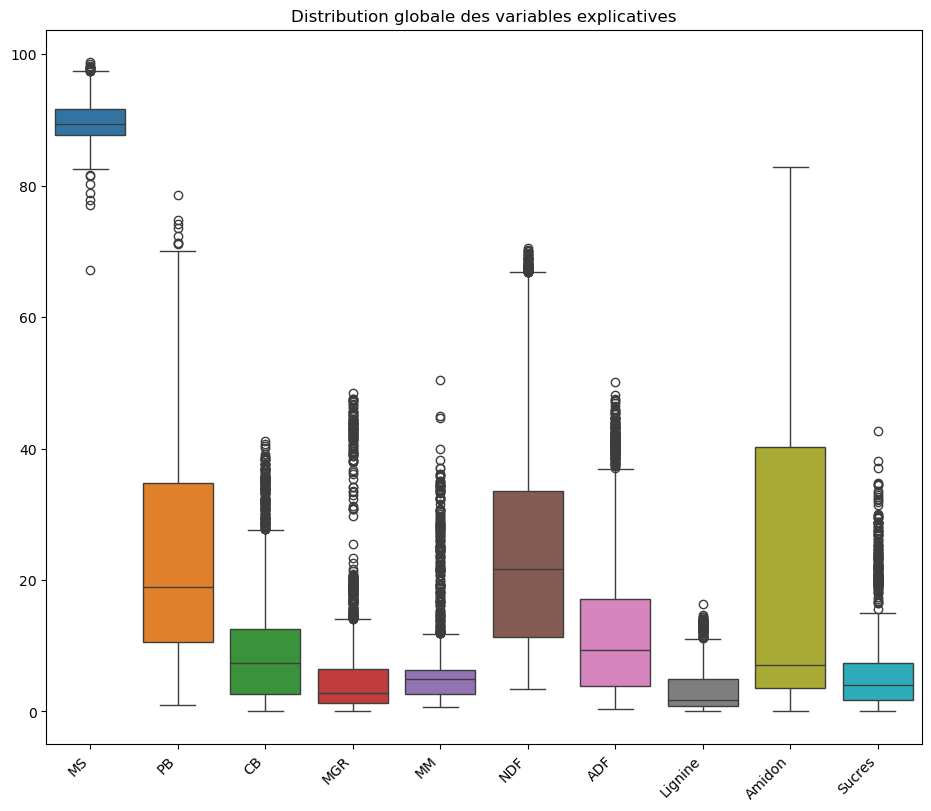

In [47]:
# Analyse de la distribution des variables explicatives et cibles
import matplotlib.gridspec as gridspec

# Distribution globale des variables explicatives
fig = plt.figure(constrained_layout=True, figsize=(18, 8))
gs = gridspec.GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])

sns.boxplot(data=data[vars_expl], ax=ax1)
ax1.set_title("Distribution globale des variables explicatives")
ax1.set_xticklabels([noms_simplifies.get(col, col) for col in vars_expl], rotation=45, ha='right')
plt.show()

# sns.boxplot(data=data[vars_cibles], ax=ax2)
# ax2.set_title("Distribution globale des variables cibles")
# ax2.set_xticklabels([noms_simplifies.get(col, col) for col in vars_cibles], rotation=45, ha='right')
# plt.show()

# # Distribution par classe
# classes = data['Classe'].dropna().unique()
# fig, axes = plt.subplots(len(vars_expl), 1, figsize=(12, 3*len(vars_expl)), sharex=True)
# for i, var in enumerate(vars_expl):
#     sns.boxplot(x='Classe', y=var, data=data, ax=axes[i])
#     axes[i].set_title(f"Distribution de {noms_simplifies.get(var, var)} par classe")
#     axes[i].set_xlabel("")
# plt.tight_layout()
# plt.show()

# # Distribution des variables cibles par classe
# fig, axes = plt.subplots(len(vars_cibles), 1, figsize=(12, 3*len(vars_cibles)), sharex=True)
# for i, var in enumerate(vars_cibles):
#     sns.boxplot(x='Classe', y=var, data=data, ax=axes[i])
#     axes[i].set_title(f"Distribution de {noms_simplifies.get(var, var)} par classe")
#     axes[i].set_xlabel("")
# plt.tight_layout()
# plt.show()

In [48]:
# Analyse de la variabilité des compositions chimiques par classe et par nom de produit
seuil_std = 10

# Fonction de coloration
def highlight_std(val):
    try:
        if float(val) > seuil_std:
            return 'background-color: orange'
    except:
        pass
    return ''

# Tableau de synthèse de la variabilité par classe (std coloré)
synthese_classe = data.groupby('Classe')[vars_expl].agg(['std'])
display(synthese_classe.style.applymap(highlight_std))

# Tableau de synthèse de la variabilité par nom de produit (std coloré)
synthese_nom = data.groupby('Nom')[vars_expl].agg(['std'])
display(synthese_nom.style.applymap(highlight_std))

/tmp/ipykernel_48927/279966704.py:15: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,MS % brut,PB % brut,CB % brut,MGR % brut,MM % brut,NDF % brut,ADF % brut,Lignine % brut,Amidon % brut,Sucres % brut
,std,std,std,std,std,std,std,std,std,std
Classe,,,,,,,,,,
"Amidon, racines et tubercules",1.714613,2.912599,6.945730,0.210870,1.886257,17.253764,8.131847,0.864823,32.599164,3.039017
Autres coproduits des céréales,3.305756,6.709193,5.649692,5.451801,1.866171,16.361236,6.591071,1.190451,14.908926,7.139998
Autres produits végétaux,1.791754,20.057908,16.636865,3.431687,2.801041,20.931847,18.980064,0.377874,2.115247,0.199607
Coproduits d'animaux terrestres,1.836363,5.751000,0.225639,2.658497,6.928815,0.699584,0.493402,0.000000,0.000000,0.000000
Coproduits de fruits et légumes,1.461852,0.525923,1.072935,0.497323,0.485646,1.392459,1.071049,0.522779,1.497048,3.992576
Coproduits du blé,2.155821,7.939783,2.640962,1.075005,1.490612,10.228061,3.718670,1.362206,19.337642,1.702654
Coproduits du maïs,3.161856,18.872667,3.654116,2.691943,2.139457,16.531962,4.395863,0.833485,3.791636,0.568797
Céréales,1.478465,1.273720,3.395757,1.294348,0.483709,7.301633,4.004142,0.511336,8.956570,0.770543


/tmp/ipykernel_48927/279966704.py:19: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,MS % brut,PB % brut,CB % brut,MGR % brut,MM % brut,NDF % brut,ADF % brut,Lignine % brut,Amidon % brut,Sucres % brut
,std,std,std,std,std,std,std,std,std,std
Nom,,,,,,,,,,
Avoine,1.327661,1.213681,1.436079,0.826456,0.357963,2.932874,1.558843,0.312816,4.009586,0.282977
Blé tendre,1.101365,0.943893,0.218745,0.143868,0.086199,0.865946,0.274219,0.076877,1.298173,0.035548
Concentré protéique de luzerne,1.074721,1.900121,0.297389,0.901780,1.394469,0.992238,0.318481,0.202000,0.028762,0.010000
Coproduits de biscuiterie,4.212229,2.223378,2.374990,4.609553,1.709162,9.072070,3.361418,1.100355,9.352199,6.848420
Coques de soja,1.261650,1.966214,2.654114,1.063567,0.436805,4.278747,3.186648,0.219770,0.085393,0.019695
Corn gluten feed,1.529511,1.263525,0.769720,0.704728,0.964784,2.153005,0.792643,0.186567,3.499592,0.036667
Corn gluten meal,1.738690,3.283337,0.747707,1.530150,1.079878,1.052295,0.442302,0.010000,3.500747,0.070861
"Drêches de blé de distillerie, amidon < 7 %",1.371055,2.500465,0.868239,0.706320,0.722940,2.991196,1.342024,0.609603,1.505079,0.408525


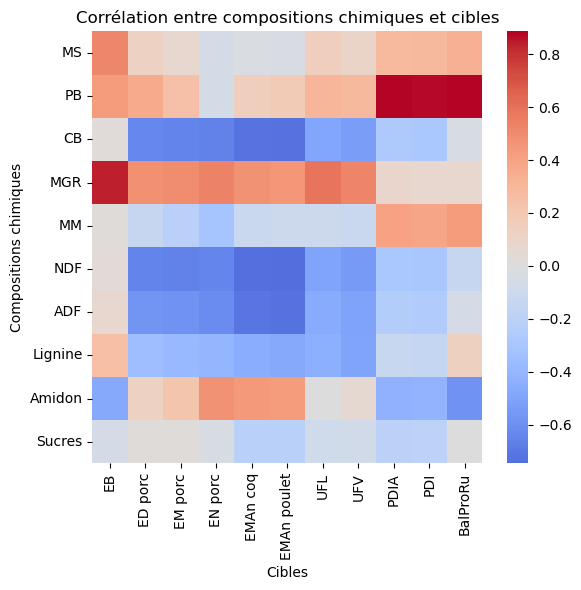

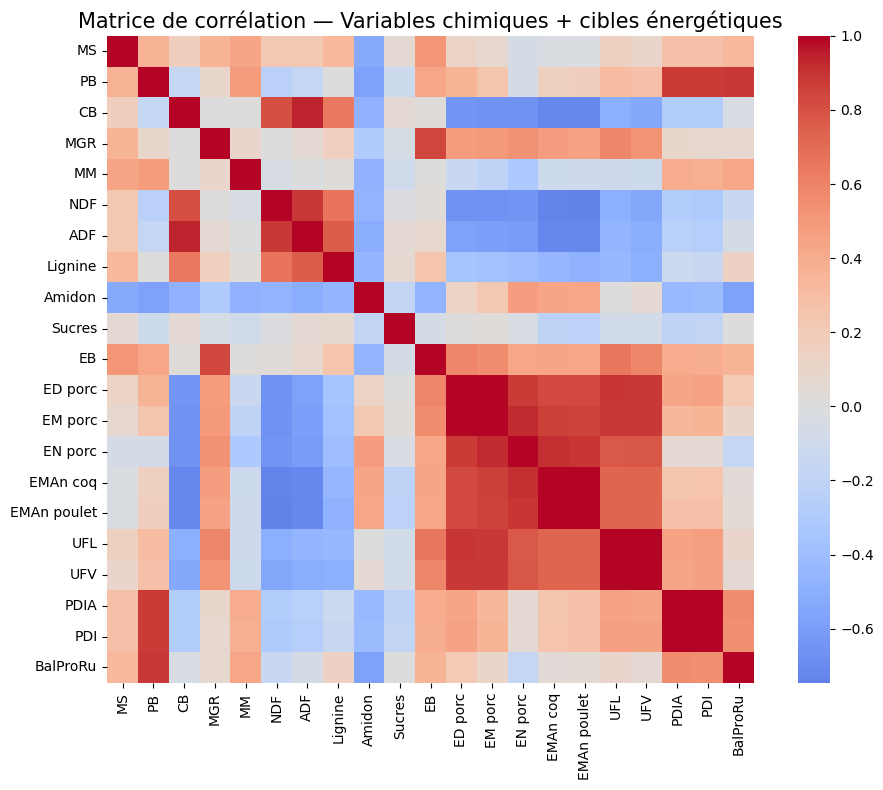

In [45]:
# Matrice de corrélation entre variables explicatives et cibles
corr_subset = data[vars_expl + vars_cibles].corr().loc[vars_expl, vars_cibles]
axes_compo = [noms_simplifies.get(col, col) for col in corr_subset.index]
axes_energie = [noms_simplifies.get(col, col) for col in corr_subset.columns]
plt.figure(figsize=(6,6))
sns.heatmap(corr_subset, annot=False, fmt=".2f", cmap="coolwarm", center=0, xticklabels=axes_energie, yticklabels=axes_compo)
plt.title("Corrélation entre compositions chimiques et cibles")
plt.xlabel("Cibles")
plt.ylabel("Compositions chimiques")
plt.tight_layout()
plt.show()

# Matrice de corrélation globale
variables_filtrees = data[vars_expl]
correlations_filtrees = variables_filtrees.join(data[vars_cibles]).corr()
axes_labels = [noms_simplifies.get(col, col) for col in correlations_filtrees.columns]
plt.figure(figsize=(10,8))
sns.heatmap(correlations_filtrees, annot=False, fmt=".2f", cmap="coolwarm", center=0, square=True, xticklabels=axes_labels, yticklabels=axes_labels)
plt.title("Matrice de corrélation — Variables chimiques + cibles énergétiques", fontsize=15)
plt.tight_layout()
plt.show()

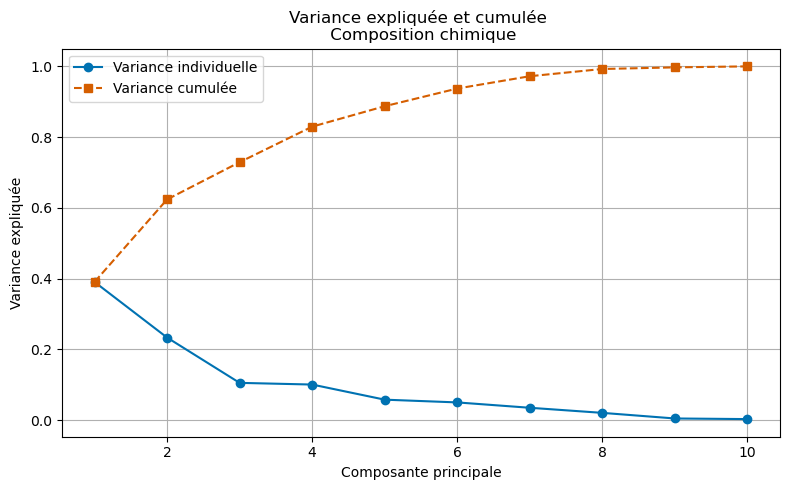

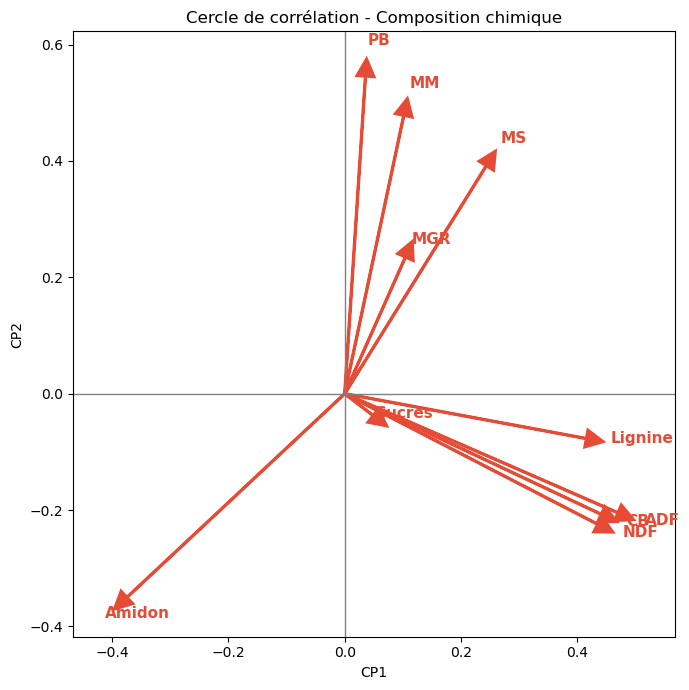

In [46]:
# ACP globale sur les variables de composition chimique
normaliseur = StandardScaler()
X_normalise = normaliseur.fit_transform(data[vars_expl])
acp = PCA()
X_acp = acp.fit_transform(X_normalise)
acp_df = pd.DataFrame(X_acp, columns=[f"CP{i+1}" for i in range(X_acp.shape[1])])
acp_df["Classe"] = data["Classe"]
acp_df["Nom"] = data["Nom"]

plt.figure(figsize=(8,5))
plt.plot(range(1, len(acp.explained_variance_ratio_)+1), acp.explained_variance_ratio_, marker='o', label="Variance individuelle", color='#0072B2')
plt.plot(range(1, len(acp.explained_variance_ratio_)+1), np.cumsum(acp.explained_variance_ratio_), marker='s', linestyle='--', label="Variance cumulée", color='#D55E00')
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.title("Variance expliquée et cumulée \n Composition chimique")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cercle de corrélation (CP1/CP2)
composantes = acp.components_[0:2]
plt.figure(figsize=(7,7))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
cercle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--', lw=1.5)
plt.gca().add_artist(cercle)
for i, var in enumerate(vars_expl):
    plt.arrow(0, 0, composantes[0, i], composantes[1, i], head_width=0.03, head_length=0.03, linewidth=2, color="#E64B35")
    plt.text(composantes[0, i]*1.1, composantes[1, i]*1.1, noms_simplifies.get(var, var), fontsize=11, color="#E64B35", weight='bold')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.title("Cercle de corrélation - Composition chimique")
plt.axis("equal")
plt.tight_layout()
plt.show()

# graphique 3D ACP 
noms_unique = acp_df["Nom"].unique()
base_colors = plt.get_cmap("tab20")(np.linspace(0, 1, len(noms_unique)))
couleur_map = {nom: matplotlib.colors.rgb2hex(base_colors[i]) for i, nom in enumerate(noms_unique)}
fig = go.Figure()
for nom in couleur_map:
    masque = acp_df["Nom"] == nom
    fig.add_trace(go.Scatter3d(
        x=acp_df.loc[masque, "CP1"],
        y=acp_df.loc[masque, "CP2"],
        z=acp_df.loc[masque, "CP3"],
        mode="markers",
        name=nom,
        marker=dict(
            size=5,
            color=couleur_map[nom],
            opacity=0.8
        ),
        hovertext=acp_df.loc[masque, "Nom"] + " (" + acp_df.loc[masque, "Classe"] + ")"
    ))
fig.update_layout(
    title="ACP 3D — Composition chimique",
    scene=dict(
        xaxis_title=f"CP1 ({acp.explained_variance_ratio_[0]*100:.1f}%)",
        yaxis_title=f"CP2 ({acp.explained_variance_ratio_[1]*100:.1f}%)",
        zaxis_title=f"CP3 ({acp.explained_variance_ratio_[2]*100:.1f}%)"
    ),
    legend_title="Nom des produits",
    width=900,
    height=700
)
fig.show()